# EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
app = pd.read_csv('application_data.csv', header=0)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Structure of Data

In [3]:
app.shape

(307511, 122)

In [4]:
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [5]:
app.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
app.nunique()

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

#### Percentage of Missing Values in Dataset

In [9]:
round((app.isnull().sum()/app.shape[0]),2)*100

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

In [10]:
missing_list = []
for i in app.columns:
    if (app[i].isnull().sum()/app.shape[0])*100>40:
        missing_list.append(i)

#### Dropping Columns With High Missing Values

In [11]:
app.drop(missing_list, axis=1, inplace=True)

In [12]:
app.shape

(307511, 73)

#### Columns With <=13% Missing Values

In [13]:
for i in app.columns:
    if (app[i].isnull().sum()/app.shape[0])*100<=13 and ((app[i].isnull().sum()/app.shape[0])*100)!=0:
        print(i,'-',(app[i].isnull().sum()/app.shape[0])*100)

AMT_ANNUITY - 0.003902299429939092
AMT_GOODS_PRICE - 0.09040327012692229
NAME_TYPE_SUITE - 0.42014757195677555
CNT_FAM_MEMBERS - 0.0006503832383231819
EXT_SOURCE_2 - 0.21462646864665005
OBS_30_CNT_SOCIAL_CIRCLE - 0.3320206431639844
DEF_30_CNT_SOCIAL_CIRCLE - 0.3320206431639844
OBS_60_CNT_SOCIAL_CIRCLE - 0.3320206431639844
DEF_60_CNT_SOCIAL_CIRCLE - 0.3320206431639844
DAYS_LAST_PHONE_CHANGE - 0.00032519161916159093


In [14]:
#NAME_TYPE_SUITE Column unique Value
app.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [15]:
#NAME_TYPE_SUITE Column mode value
app.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [16]:
#CNT_FAM_MEMBERS Column unique Value
app.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [17]:
#CNT_FAM_MEMBERS describe
app.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [18]:
#CNT_FAM_MEMBERS Column median
app.CNT_FAM_MEMBERS.median()

2.0

In [19]:
#AMT_ANNUITY describe
app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [20]:
#AMT_GOODS_PRICE describe
app.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [21]:
#DAYS_LAST_PHONE_CHANGE describe
app.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

### Imputation of Missing Values (Suggestions)

The five missing columns with less than or equal to 13% missing values are-
<br>
1.NAME_TYPE_SUITE- <br>
*  We can either drop these rows from the column as it only contains 0.42% missing values and dropping them wouldn't affect the analysis much<br> 
*  We can also combine the 'Other_A', 'nan', 'Other_B', categories into a new **'Others'** category 
<br>
2.CNT_FAM_MEMBERS- <br>
*  We can drop these rows from the columns as it only contains 0.00065% missing values and dropping them wouldn't affect the analysis much.<br>
*  We can also leave the missing values without any changes as there are outliers in the data and nothing for sure can be said about the size of the families as it could vary widely.  
<br>
3.AMT_ANNUITY- <br>
*  We can either drop these rows from the column as it only contains 0.0039% missing values and dropping them wouldn't affect the analysis much.<br>
*  We can also leave the missing values without any changes as there is no basis for predicting the amount. 
<br>
4.AMT_GOODS_PRICE- <br>
*  We can either drop these rows from the column as it only contains 0.09% missing values and dropping them wouldn't affect the analysis much.<br>
*  We can also leave the missing values without any changes as from the data we cannot predict the amount of goods for which they are taking loan. The goods can also vary from smartphones to bikes having diiferent range of pricing. 
<br>
5.DAYS_LAST_PHONE_CHANGE-<br>
*  We can drop these rows from the column as it only contains 0.0003% missing values and dropping them wouldn't affect the analysis much.<br>

#### Checking Datatypes

In [22]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [24]:
app.DAYS_BIRTH = abs(app.DAYS_BIRTH)                       

In [25]:
app.DAYS_EMPLOYED = abs(app.DAYS_EMPLOYED)

In [26]:
app.DAYS_REGISTRATION = abs(app.DAYS_REGISTRATION)

In [27]:
app.DAYS_ID_PUBLISH = abs(app.DAYS_ID_PUBLISH)

In [28]:
app.DAYS_LAST_PHONE_CHANGE = abs(app.DAYS_LAST_PHONE_CHANGE)

#### Checking For Outliers

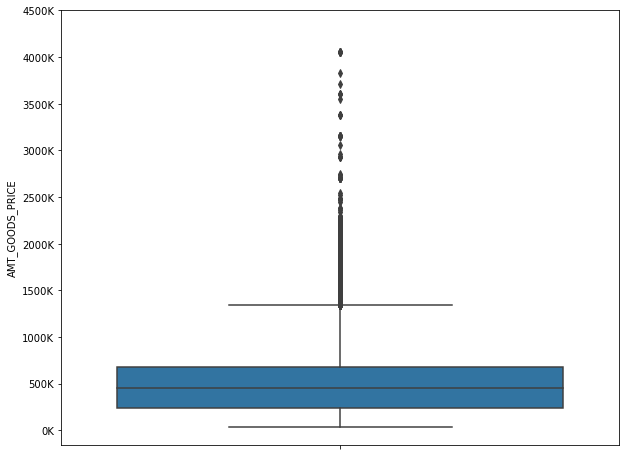

In [29]:
# Boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(10,8))
sns.boxplot(data=app, y='AMT_GOODS_PRICE')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### AMT_GOODS_PRICE Observation <br>
AMT_GOODS_PRICE is the price of the goods for which the loan is given. Here from the plot we can see that median from the plot is around 500K. The plot does contains outliers but the outliers are more in continuation. 


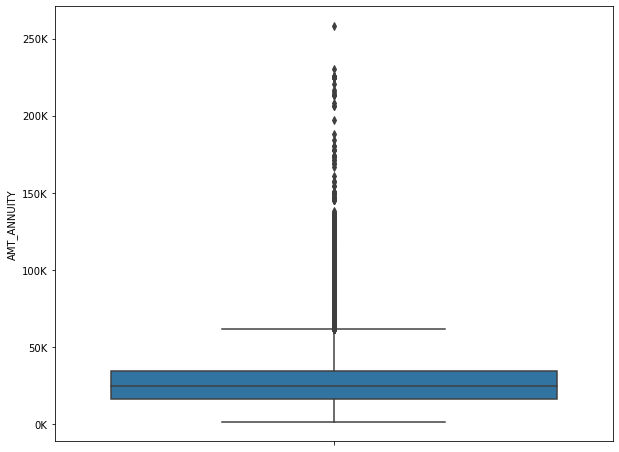

In [30]:
# Boxplot for AMT_ANNUITY
plt.figure(figsize=(10,8))
sns.boxplot(data=app, y='AMT_ANNUITY')
ticks = np.arange(0,300000,50000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### AMT_ANNUITY Observation
It is the loan annunity. The median value for the column is around 25K. The outliers in this case are rather continuous. 

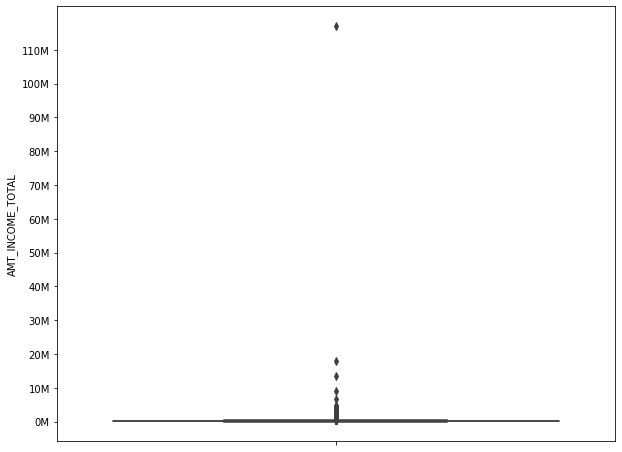

In [31]:
# Boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(10,8))
sns.boxplot(data=app, y='AMT_INCOME_TOTAL')
ticks = np.arange(0,120000000,10000000)
labels =['{}M'.format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### AMT_INCOME_TOTAL Observation <br>
AMT_INCOME_TOTAL is the income amount of the clients. Here in AMT_INCOME_TOTAL we can clearly see that there is a big outlier in the range greater than 110M. For this column, median could be a good representation.  

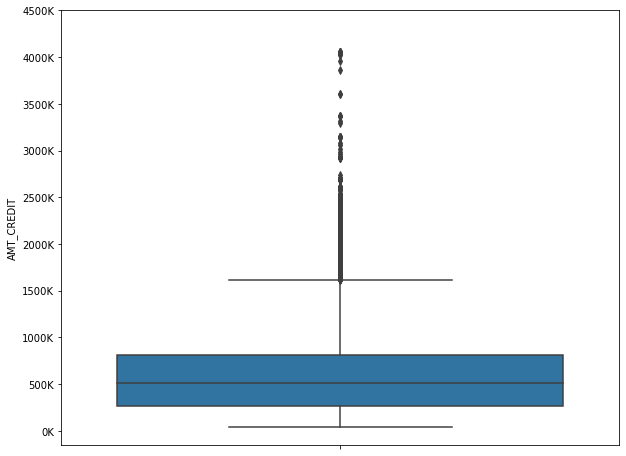

In [32]:
# Boxplot for AMT_CREDIT
plt.figure(figsize=(10,8))
sns.boxplot(data=app, y='AMT_CREDIT')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### AMT_CREDIT Observation
It is the credit amount of the loan with median value around 500k. The plot is also in line with AMT_GOODS_PRICE which is the price of good for which the loan is given and it confirms the observation above in AMT_GOODS_PRICE.  

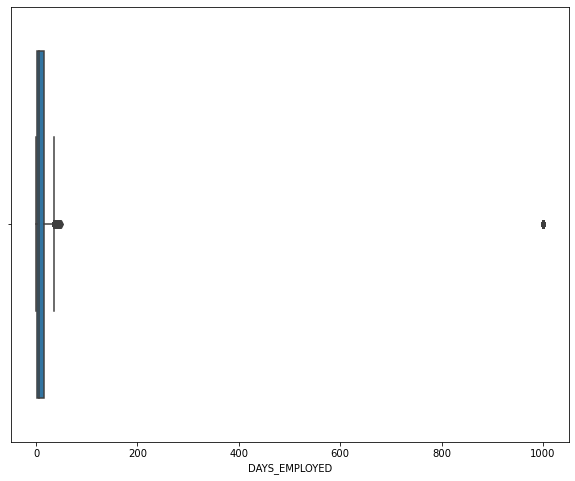

In [33]:
# Boxplot for year_employed
plt.figure(figsize=(10,8))
year_employed = app.DAYS_EMPLOYED/365
sns.boxplot(year_employed)
plt.show()

#### year_employed Observation <br>
Here we have converted the number of days the person has been in their current employment to number of years.From the boxplot we can clearly see that someone has 1000 years of employment experience which is wrong data that needs to be removed.

### Binning 

In [34]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [38]:
app['AMT_INCOME_GROUP'] = pd.cut(app.AMT_INCOME_TOTAL,(0,50000, 100000,150000,200000,250000,900000000),labels=['<50K','50K-100K','100K-150K','150K-200K','200K-250K','250K+'])

In [39]:
app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200K-250K
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250K+
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50K-100K


In [41]:
(app.DAYS_BIRTH//365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [46]:
app['YEAR_BIRTH_GROUP'] = pd.cut((app.DAYS_BIRTH//365),(20,30,40,50,60,70,100),labels=['20','20-30','30-40','40-50','50-60','60+'])

In [47]:
app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,YEAR_BIRTH_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200K-250K,20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250K+,30-40
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50K-100K,40-50


## Analysis

#### Defaulters Vs Non-Defaulters Percentage

In [49]:
app.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Dividing Dataset Based on Target Column

In [51]:
target_0 = app[app.TARGET==0]
target_0.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,YEAR_BIRTH_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250K+,30-40
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50K-100K,40-50
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100K-150K,40-50


In [52]:
target_1 = app[app.TARGET==1]
target_1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,YEAR_BIRTH_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200K-250K,20
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,100K-150K,40-50
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,200K-250K,30-40


In [74]:
cat_cols = []
for i in app.columns:
    if app[i].nunique()<=18:
        cat_cols.append(i)
print(cat_cols)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_1

#### Univariate Analysis

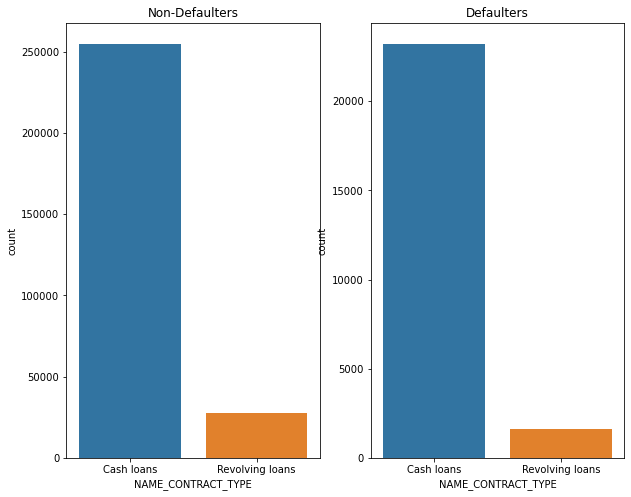

In [77]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_CONTRACT_TYPE'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_CONTRACT_TYPE'])
plt.title('Defaulters')
plt.show()

#### Observations from Type of Loan
From the above plot we can see that both defaulters and non-defaulters are having high number of Cash loan and less number of Revolving loans. So, from this we can say that Cash loan and Revolving loans are not playing a major role in someone becoming a defaulter or paying back their loans. 

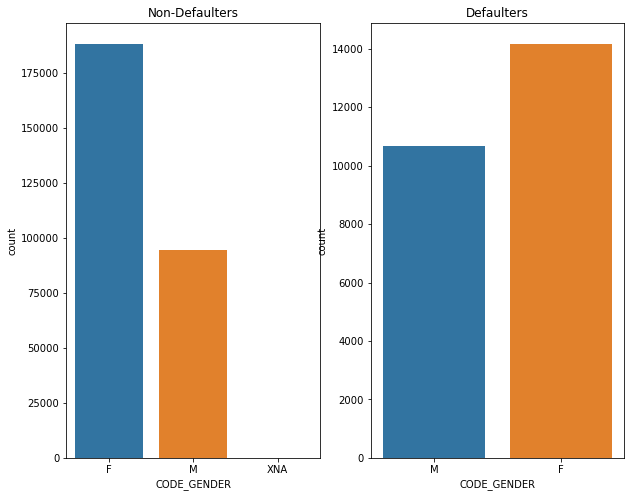

In [78]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(target_0['CODE_GENDER'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target_1['CODE_GENDER'])
plt.title('Defaulters')
plt.show()

#### Observation from Gender of Deafulters
From the above plot we can say that gender doesn't play a significant role in someone being a defaulter or non-defaulter. So, we can say that it is a nuetral parameter. 

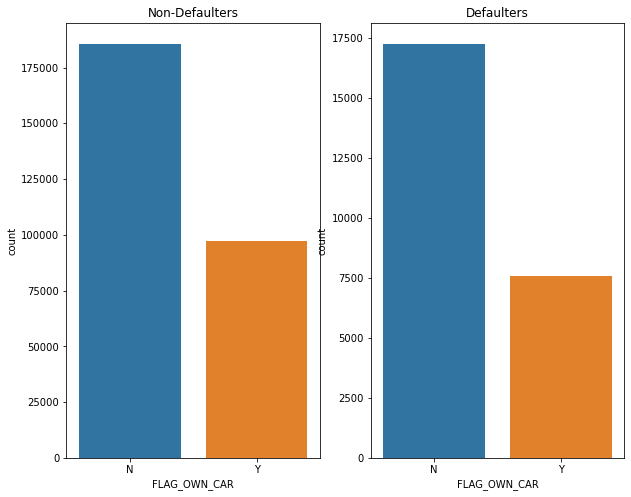

In [79]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_OWN_CAR'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_OWN_CAR'])
plt.title('Defaulters')
plt.show()

#### Observation Whether Client Owns a Car
This also looks like a nuetral parameter and cannot be used to make predictions about defaulters and non-defaulters.

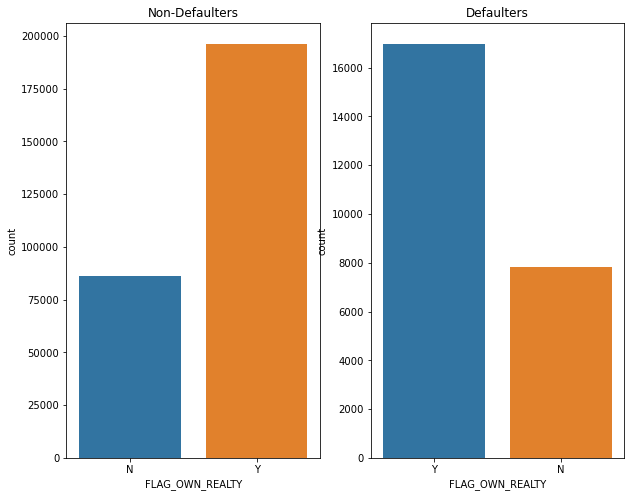

In [80]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_OWN_REALTY'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_OWN_REALTY'])
plt.title('Defaulters')
plt.show()

#### Observation (Owns Real Estate vs those who don't)
This again seems to make no difference as there is high amount of people who owns real estate who are both defaulters and non-defaulters

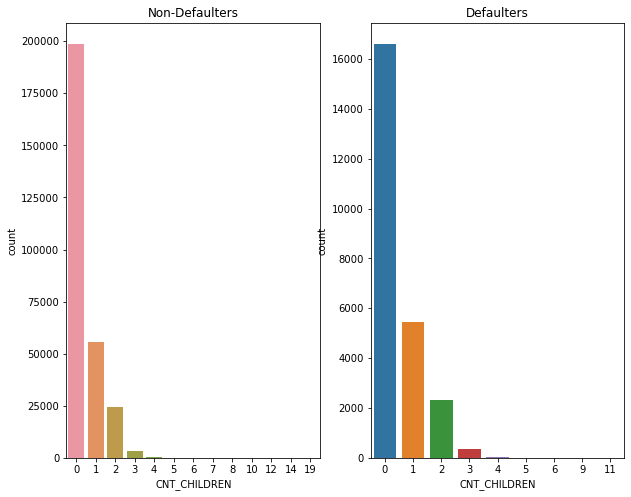

In [81]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(target_0['CNT_CHILDREN'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(target_1['CNT_CHILDREN'])
plt.title('Defaulters')
plt.show()

#### Observation based on count of children
This too doesn't seem to effect defaulters and non-defaulter. So, we can say that it is also a neutral parameter. 

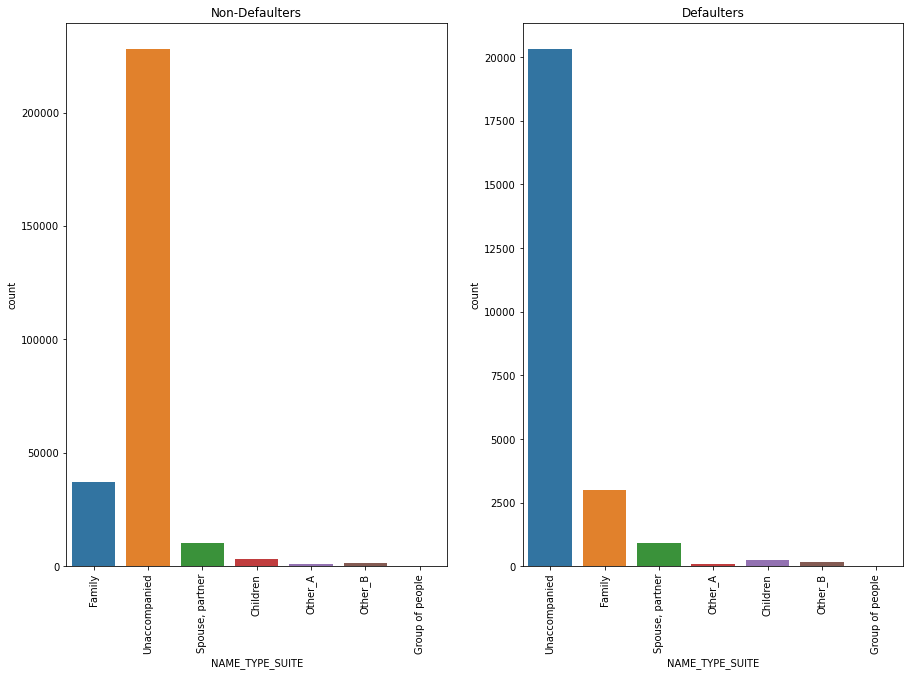

In [85]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_TYPE_SUITE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_TYPE_SUITE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation on whom client was accompanied with
This is also a nuetral parameters as the unaccompanied ones are having highest count among both defaulters and non-defaulters. 

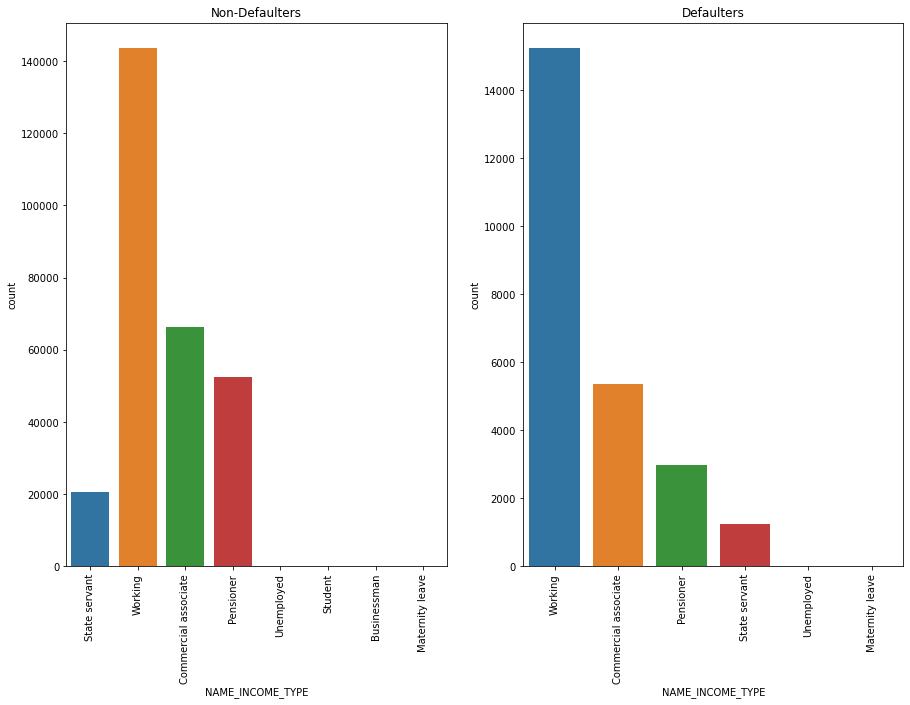

In [86]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_INCOME_TYPE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_INCOME_TYPE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observation
This is a nuetral parameter.

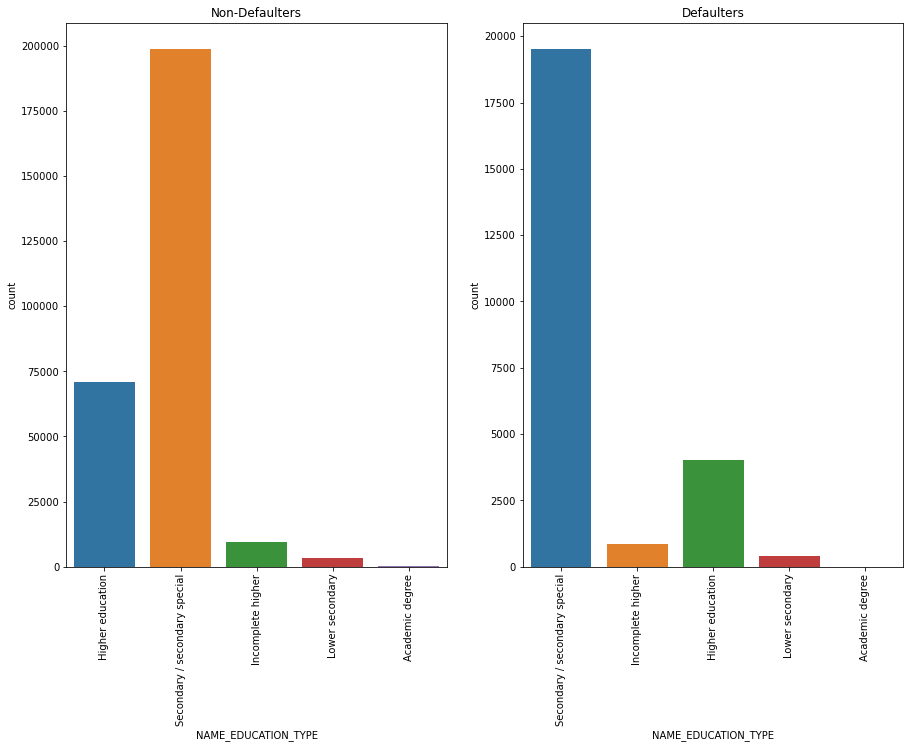

In [97]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_EDUCATION_TYPE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_EDUCATION_TYPE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observation
This is a nuetral parameter and we can observe that the Secondary/secondary special are having highest number of count in both defaulters and non-defaulters.

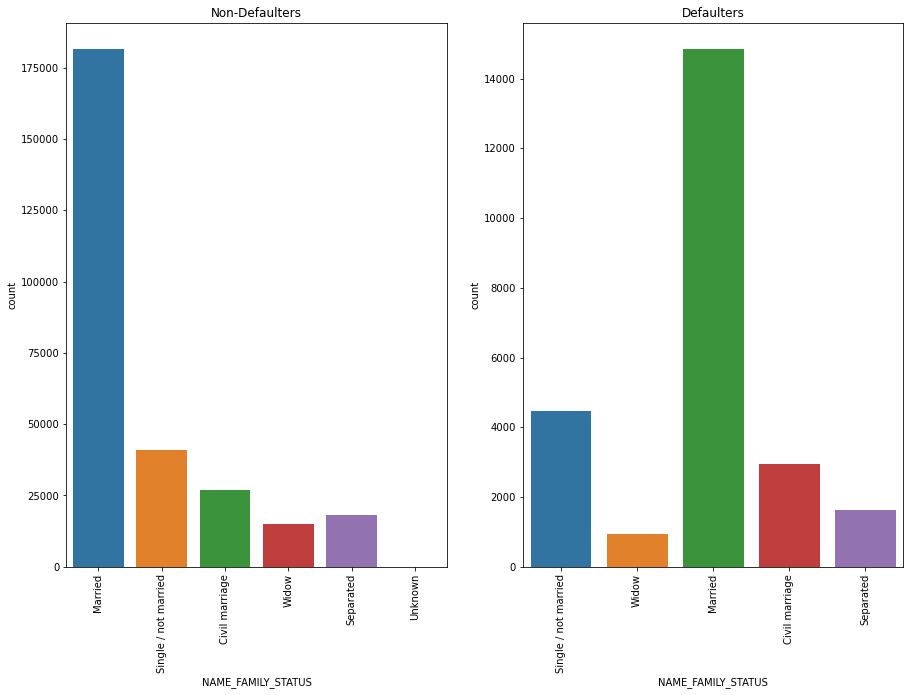

In [88]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_FAMILY_STATUS'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_FAMILY_STATUS'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observation
The Family status also does not seem to affect the person in being defaulter or non-defaulter so it is a nuetral parameter. 

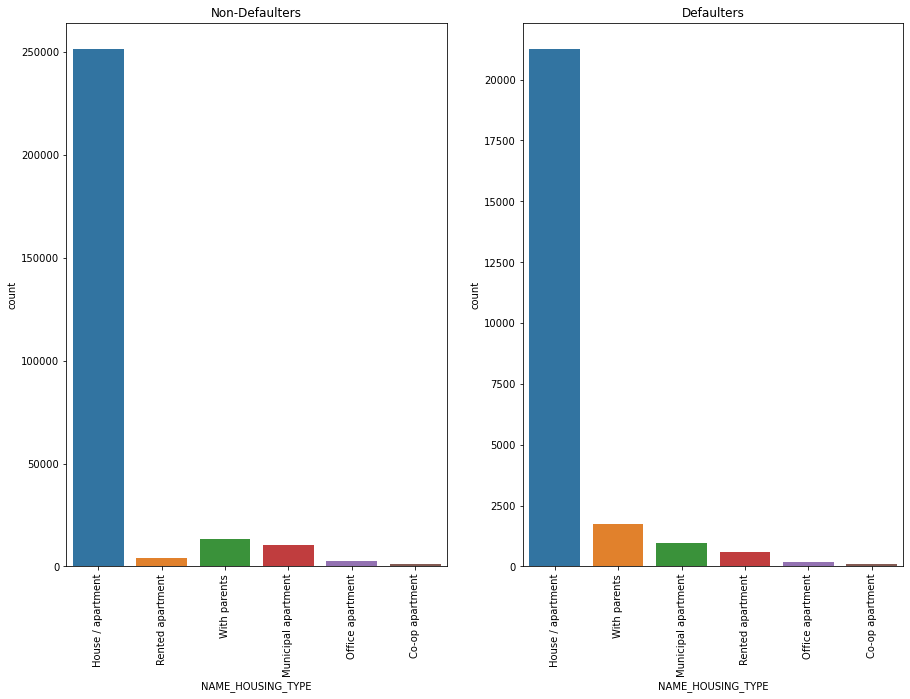

In [89]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['NAME_HOUSING_TYPE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['NAME_HOUSING_TYPE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
The people with House/apartments are both the highst defaulters and the non-defaulters and similarly the co-op apartment types are the least in count for both defaulters and non-defaulters. 

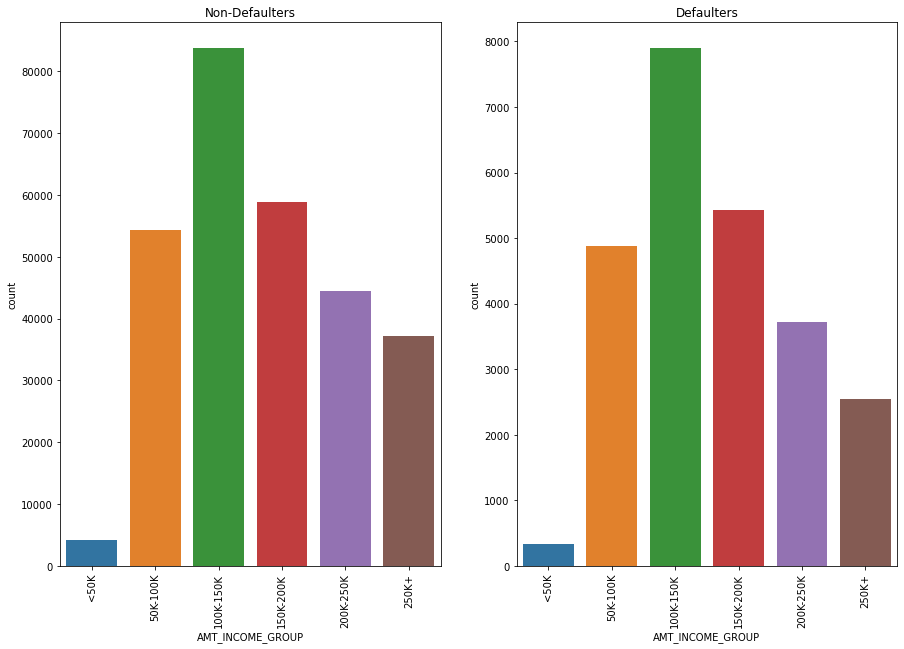

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['AMT_INCOME_GROUP'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['AMT_INCOME_GROUP'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation on the Income Group
The income group of people from both defaulters and non-defaulters looks similar and doesn't seems to make a difference. 

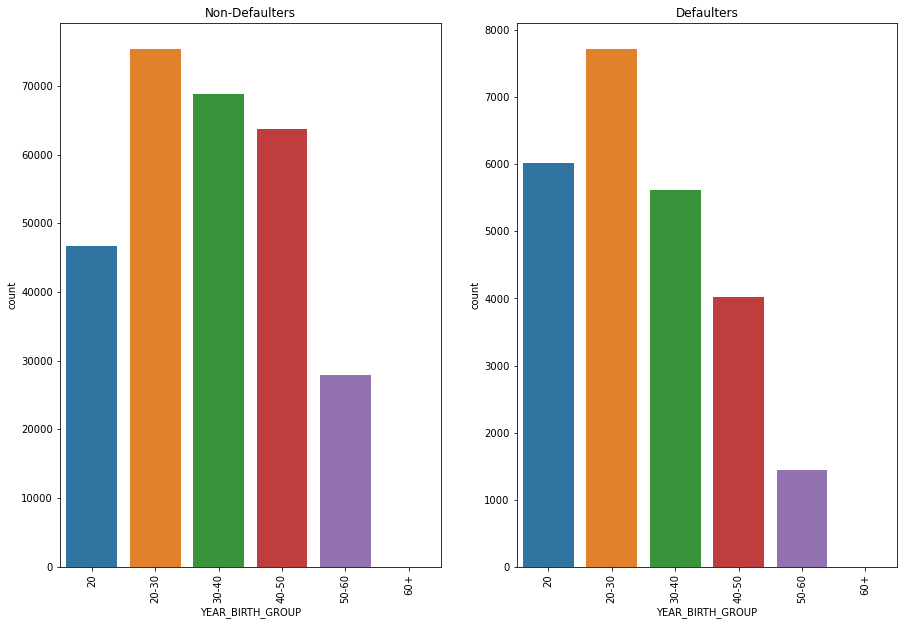

In [98]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['YEAR_BIRTH_GROUP'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['YEAR_BIRTH_GROUP'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
The non-defaulters in the 40-50 group is higher than those in 20 and in the defaulters group the 40-50 are less than the less than 20 group which means the people in their 40's are less likely to default than people in less than 20. The defaulters in the 50-60 group is less than that of 40-50

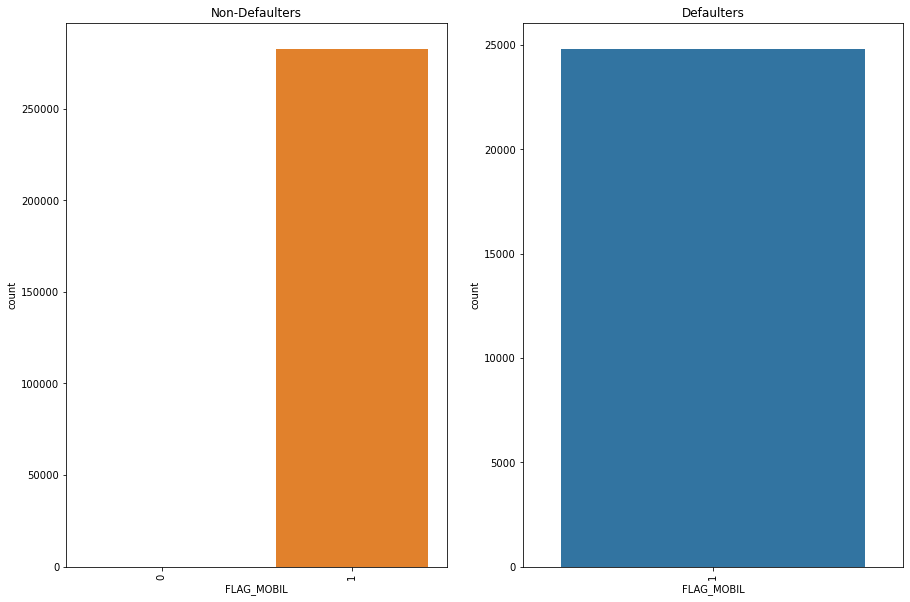

In [99]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_MOBIL'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_MOBIL'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation on whether client provided mobile number
This doesn't seems to make any difference as in both cases the clients have provided the mobile number. 

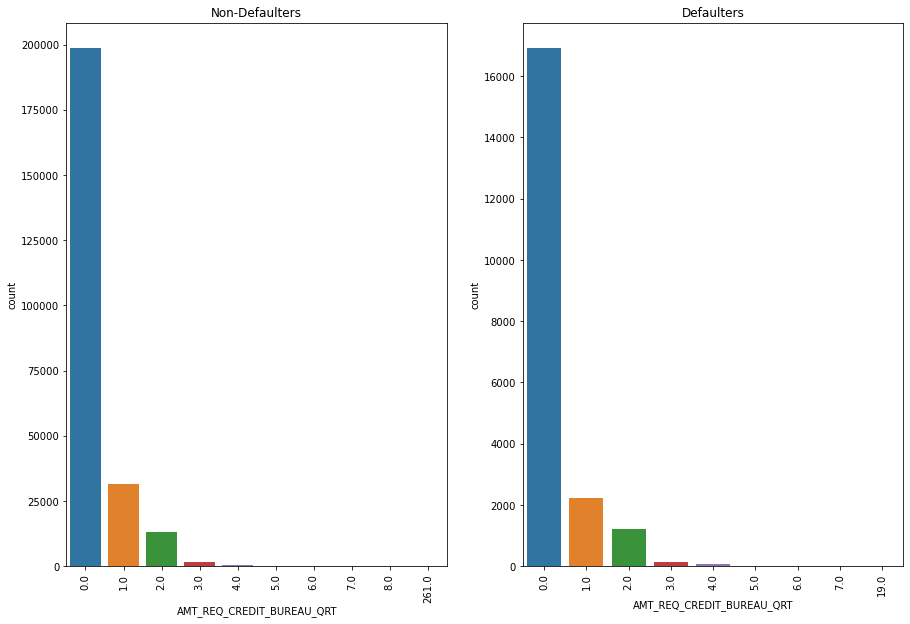

In [101]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

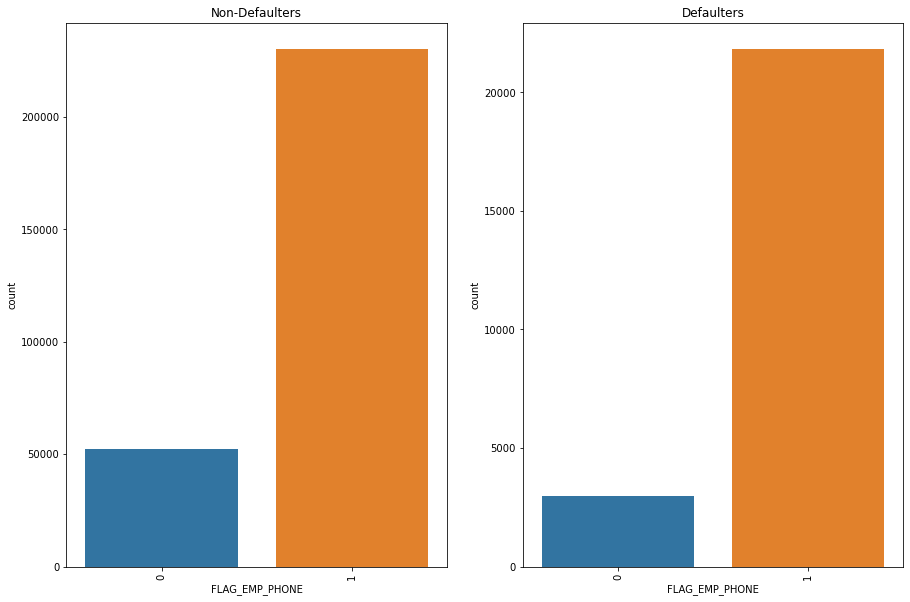

In [102]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_EMP_PHONE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_EMP_PHONE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observation
This is a nuetral parameter as in both groups the people have provided their work phone numbers. 

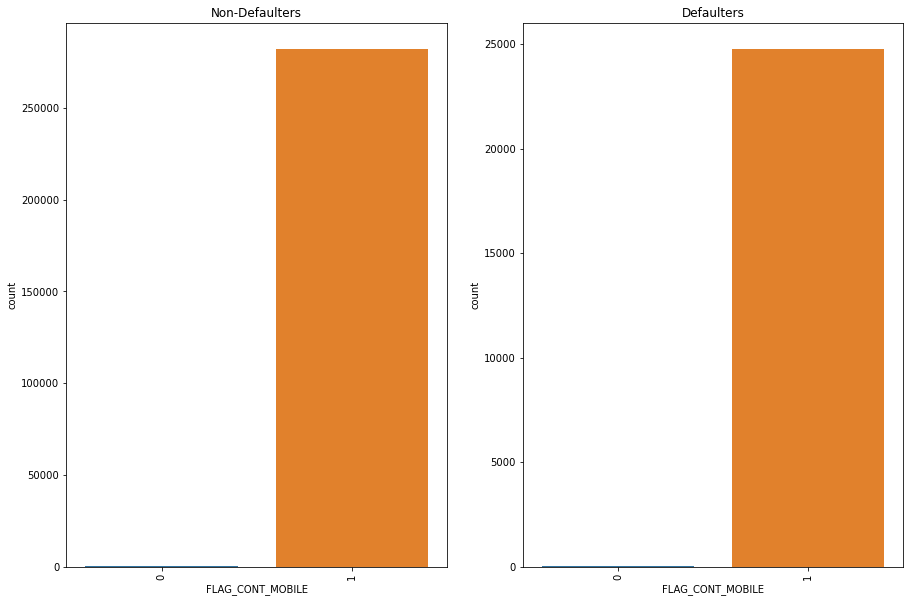

In [103]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_CONT_MOBILE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_CONT_MOBILE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
In both the cases the mobile phone of the clients were reachable so this is also a nuetral parameter. 

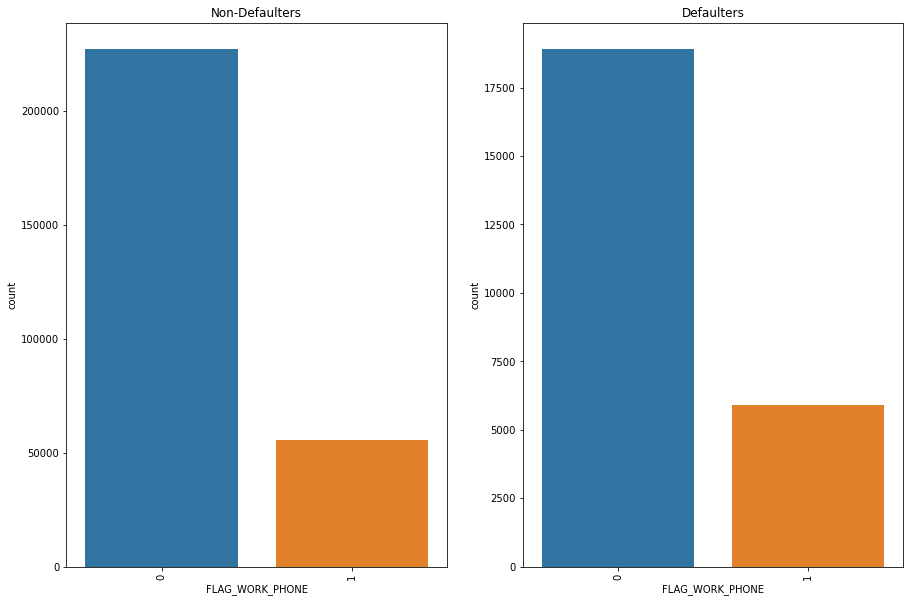

In [104]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['FLAG_WORK_PHONE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['FLAG_WORK_PHONE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
In both the cases, the people have provided their home phone numbers. 

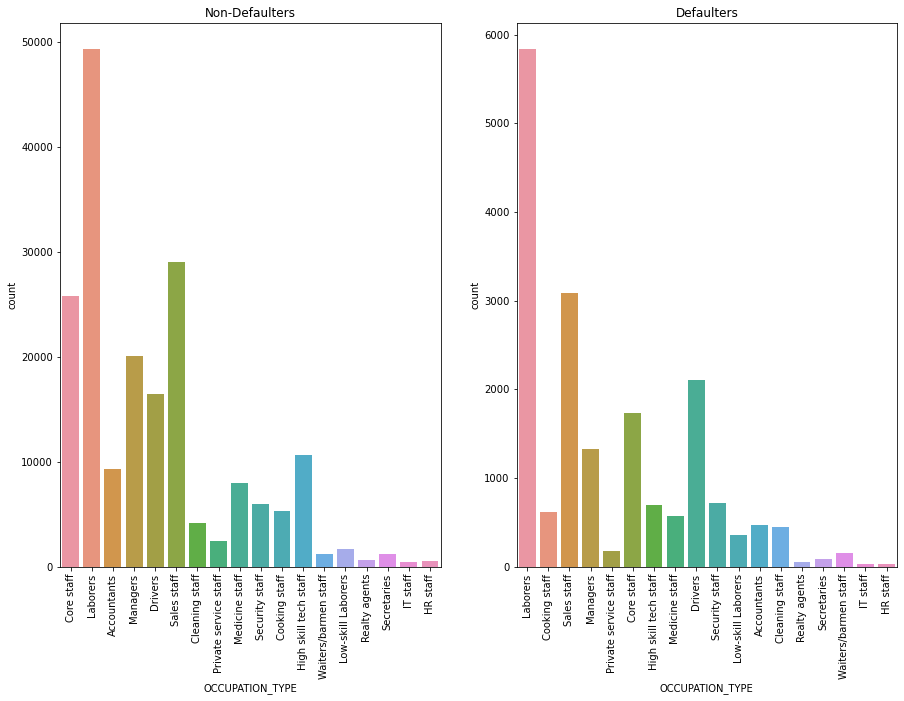

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
In both the cases the labourers are the highest defaulters and non-defaulters similarly IT Staff and HR Staff are least in both the categories.  

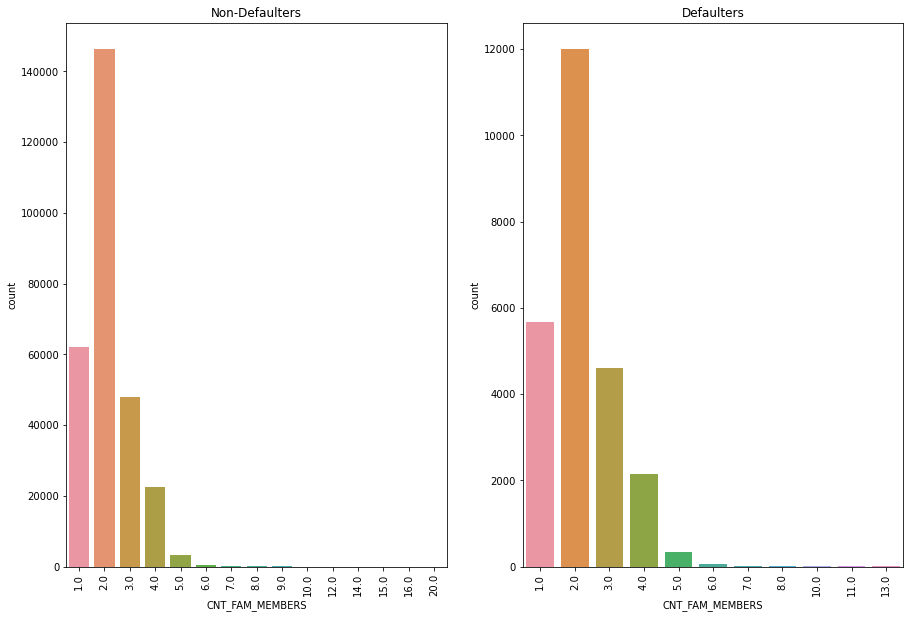

In [106]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['CNT_FAM_MEMBERS'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['CNT_FAM_MEMBERS'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
The graph for both the defaulters and non-defaulters are similar which implies that there is a nuetral relationship between family member count and the persoon defaulting or not defaulting. 

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['

In [ ]:
REGION_RATING_CLIENT

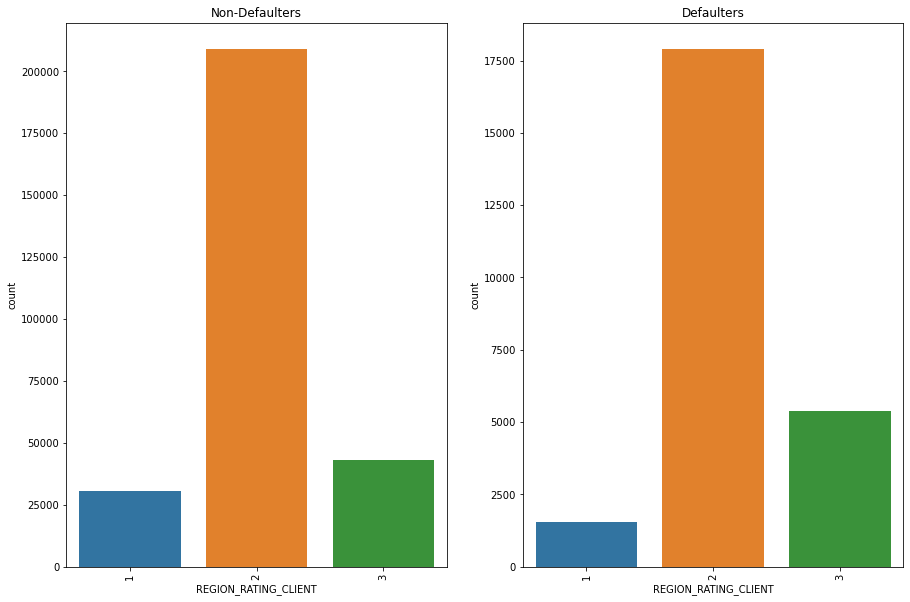

In [107]:
'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['REGION_RATING_CLIENT'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
The clients with region rating 1 are less in default categories but this does not hold for clients with region rating 2 and for the cleint in region rating 3 there is a slight increase in defaults. 

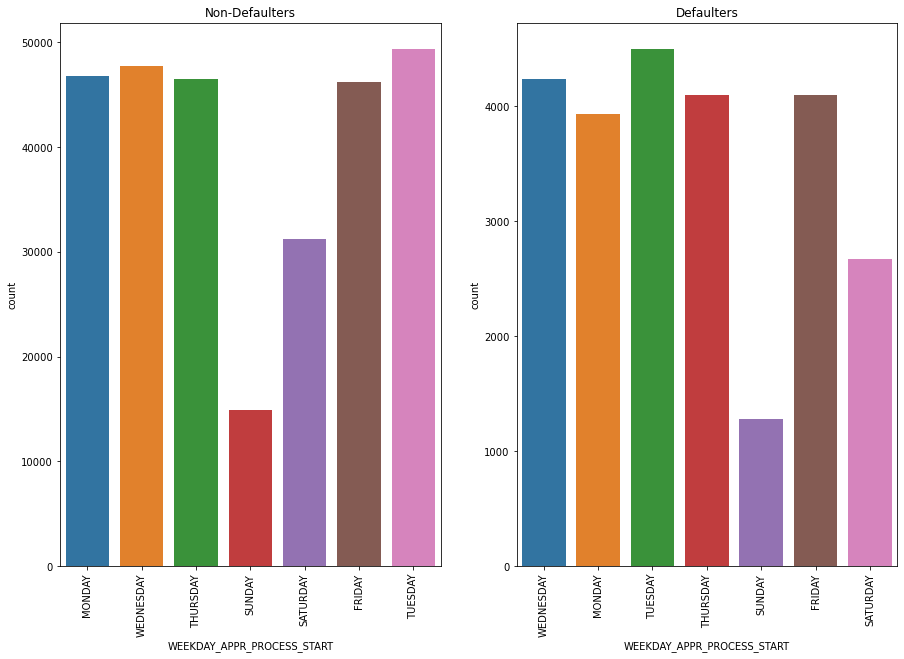

In [109]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(target_0['WEEKDAY_APPR_PROCESS_START'])
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(target_1['WEEKDAY_APPR_PROCESS_START'])
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
There is nuetral relationship between the application start day and the default and non-default categories. 

In [111]:
cont_cols = []
for i in app.columns:
    if app[i].nunique()>18:
        cont_cols.append(i)
print(cont_cols)

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']


#### Correlation of Numerical Columns for baoth the cases of Target 0 and 1

In [163]:
target_0_corr =target_0[['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
target_0_corr

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,0.000309,-0.000695,-0.000741,0.000998,0.000054,0.004349
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.072401,-0.027828,-0.027690,0.041338,0.061470,0.029536
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,0.036085,-0.000914,-0.000892,0.069540,0.054071,-0.048866
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,0.028051,-0.013091,-0.012893,0.062013,0.038181,-0.010882
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,0.038908,-0.000707,-0.000723,0.071373,0.055850,-0.051266
REGION_POPULATION_RELATIVE,0.000360,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012486,-0.012107,-0.011591,0.041164,0.078629,0.001775
DAYS_BIRTH,0.001346,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,0.078158,0.197287,-0.007726,-0.007316,0.076510,-0.002855,0.072886
DAYS_EMPLOYED,0.001744,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.028530,0.111995,0.007272,0.007453,-0.023379,-0.034890,0.052169
DAYS_REGISTRATION,0.001475,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.214511,1.000000,0.100236,0.008044,0.052503,0.103476,-0.008315,-0.008247,0.053533,0.011857,0.026639
DAYS_ID_PUBLISH,0.000077,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.271314,0.276663,0.100236,1.000000,-0.033980,0.041703,0.124715,0.012326,0.012810,0.082949,0.008728,0.035639


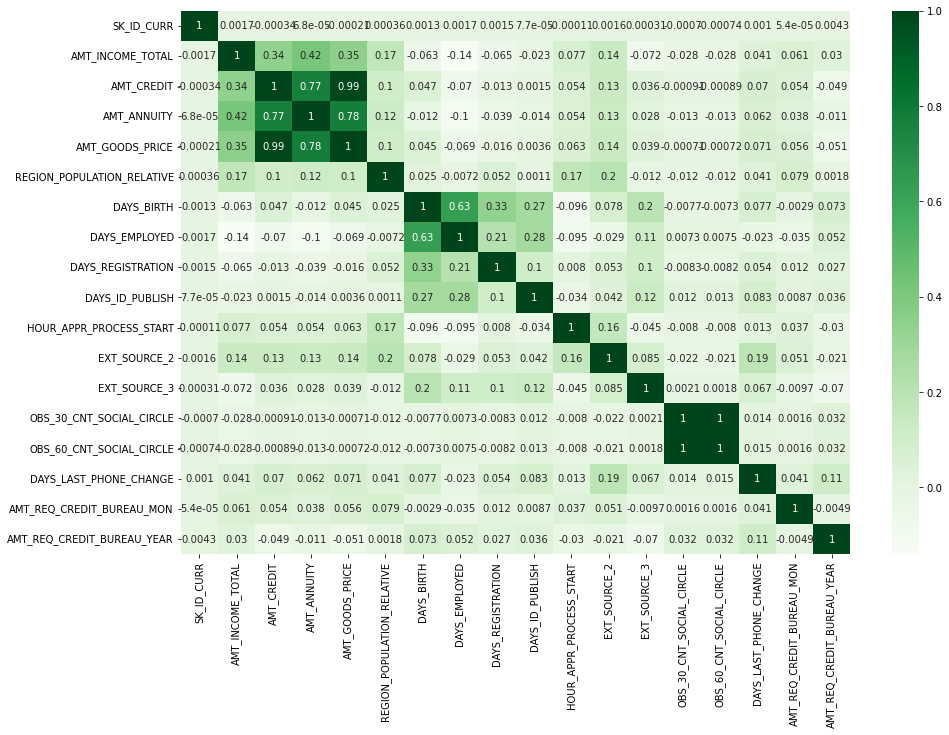

In [166]:
plt.figure(figsize=(15,10))
sns.heatmap(target_0_corr, cmap='Greens', annot=True)
plt.show()

In [156]:
target_1_corr =target_0[['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
target_1_corr

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,0.001589,0.000309,-0.000695,-0.000741,0.000998,0.000054,0.004349
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.139598,-0.072401,-0.027828,-0.027690,0.041338,0.061470,0.029536
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,0.129140,0.036085,-0.000914,-0.000892,0.069540,0.054071,-0.048866
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,0.126615,0.028051,-0.013091,-0.012893,0.062013,0.038181,-0.010882
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,0.135694,0.038908,-0.000707,-0.000723,0.071373,0.055850,-0.051266
REGION_POPULATION_RELATIVE,0.000360,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,0.198493,-0.012486,-0.012107,-0.011591,0.041164,0.078629,0.001775
DAYS_BIRTH,0.001346,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,0.078158,0.197287,-0.007726,-0.007316,0.076510,-0.002855,0.072886
DAYS_EMPLOYED,0.001744,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.028530,0.111995,0.007272,0.007453,-0.023379,-0.034890,0.052169
DAYS_REGISTRATION,0.001475,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.214511,1.000000,0.100236,0.008044,0.052503,0.103476,-0.008315,-0.008247,0.053533,0.011857,0.026639
DAYS_ID_PUBLISH,0.000077,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.271314,0.276663,0.100236,1.000000,-0.033980,0.041703,0.124715,0.012326,0.012810,0.082949,0.008728,0.035639


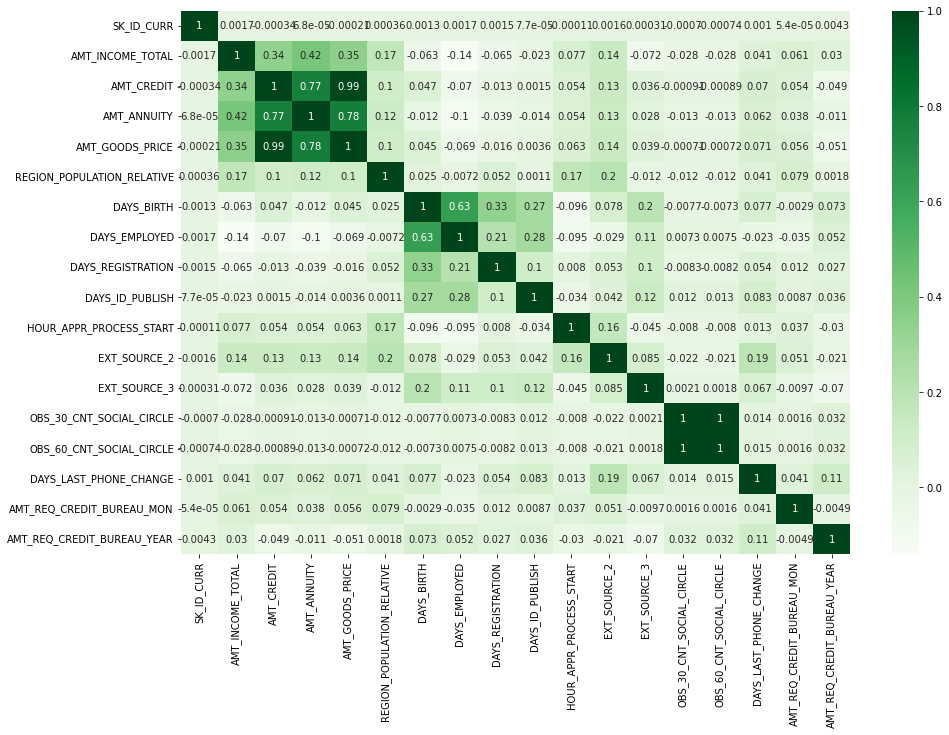

In [167]:
plt.figure(figsize=(15,10))
sns.heatmap(target_1_corr, cmap='Greens', annot=True)
plt.show()

#### Heatmap Observation
From the above two heatmap we can see that the highest correlation in both the target_0 and target_1 are same.

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='AMT_INCOME_TOTAL')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='

In [ ]:
AMT_INCOME_TOTAL

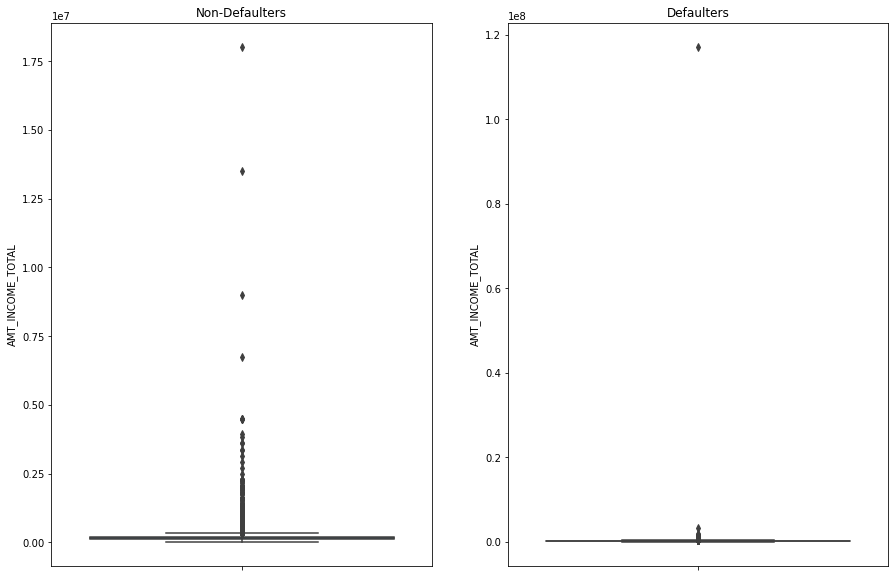

In [117]:
')
plt.title('Defaulters')

plt.show()

#### Observation based on Income of Client
From the above plots it looks like those with higher incomes are less likely to default as the defaulter plot seems to have a single earning outlier with very high income. 

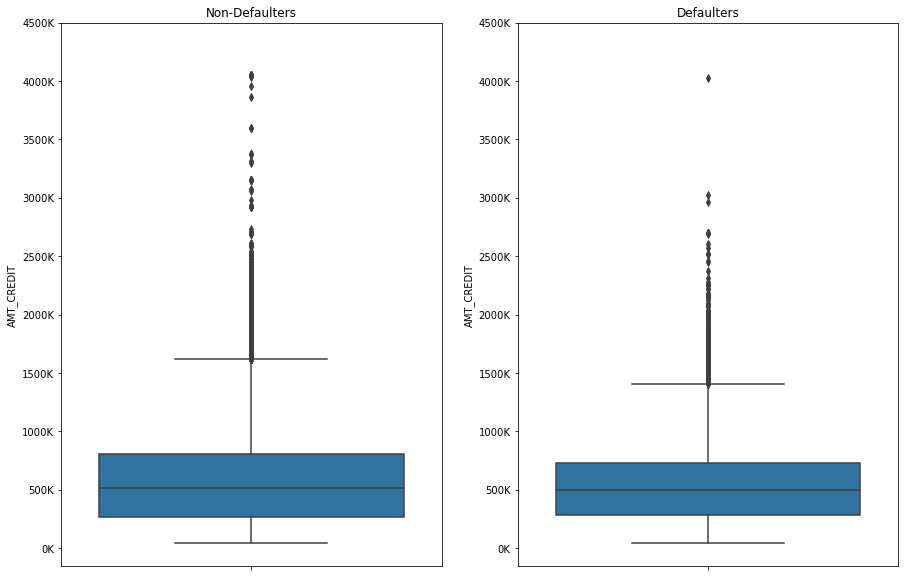

In [119]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='AMT_CREDIT')
plt.title('Non-Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='AMT_CREDIT')
plt.title('Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation based on credit amount of the loan
The median value for the credit amount of the loan is aound 500K in both the cases of defaulters and non-defaulters. There also seems to be less defaults with increasing amount of credit in the range of 3000K and above. 

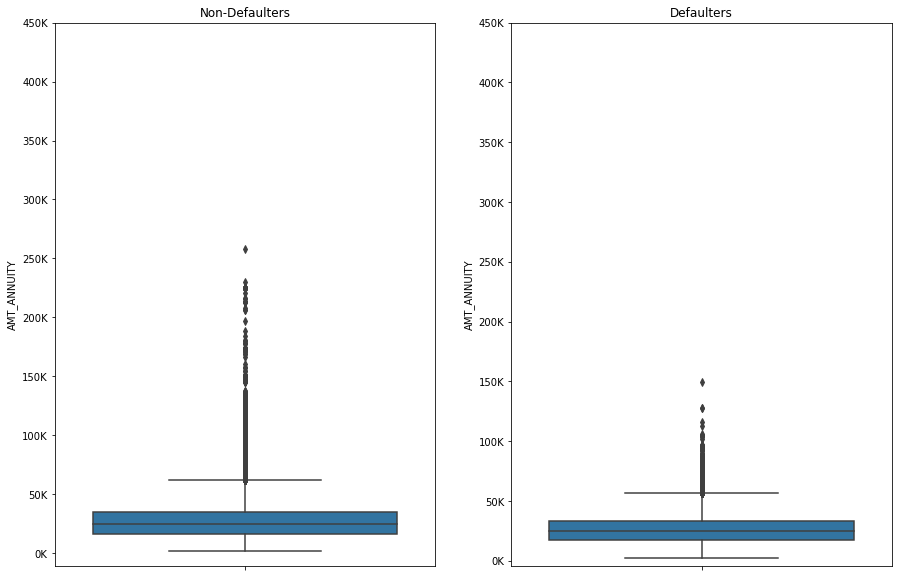

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='AMT_ANNUITY')
plt.title('Non-Defaulters')
ticks = np.arange(0,500000,50000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='AMT_ANNUITY')
plt.title('Defaulters')
ticks = np.arange(0,500000,50000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation Based on Amount Annuity
The median for the amount annuity for Non-defaulters is higher compared to defaulters. The highest amount of annuity for the defaulters is significantly less compared to non-defaulters. 

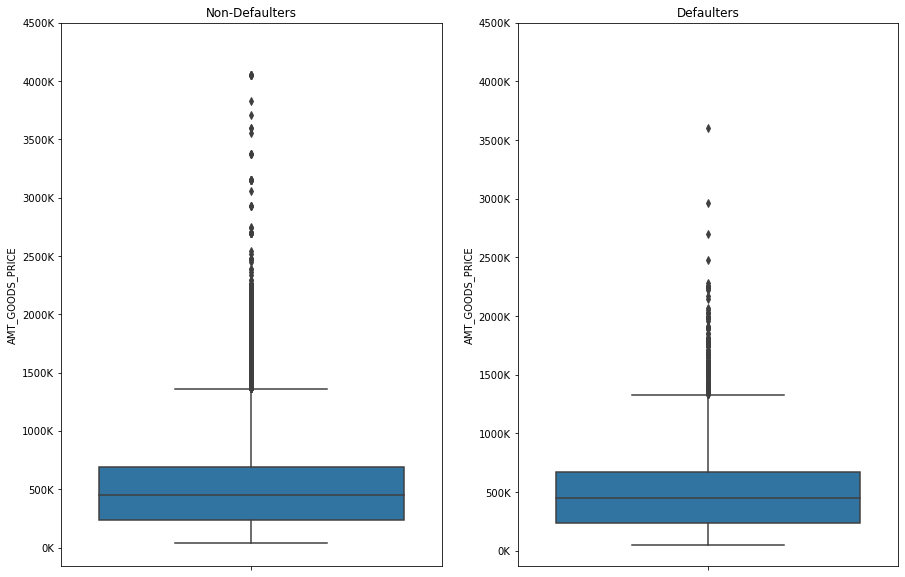

In [123]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='AMT_GOODS_PRICE')
plt.title('Non-Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='AMT_GOODS_PRICE')
plt.title('Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

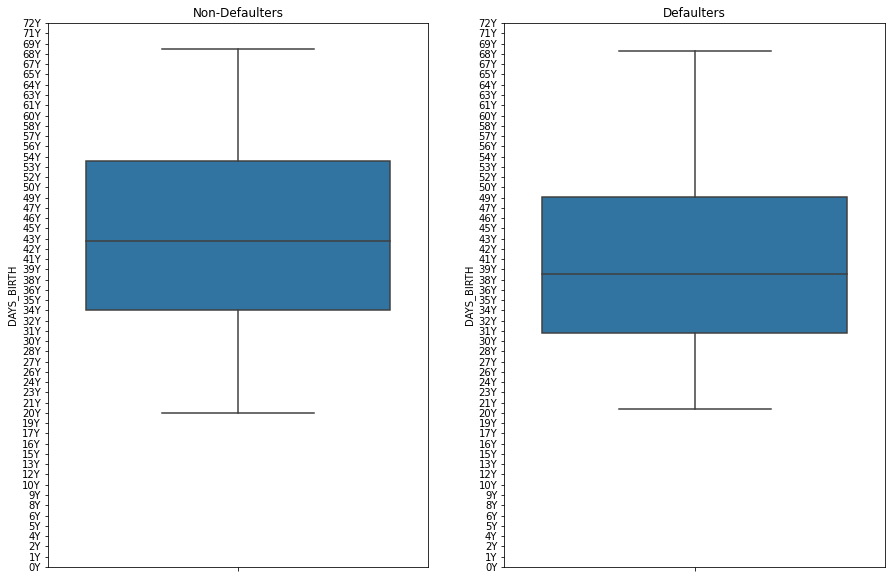

In [134]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='DAYS_BIRTH')
plt.title('Non-Defaulters')
ticks = np.arange(0,27000,500)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='DAYS_BIRTH')
plt.title('Defaulters')
ticks = np.arange(0,27000,500)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation based on age of the defaulters
The median age of non-defaulters seems to be a bit higher than that of defaulters.

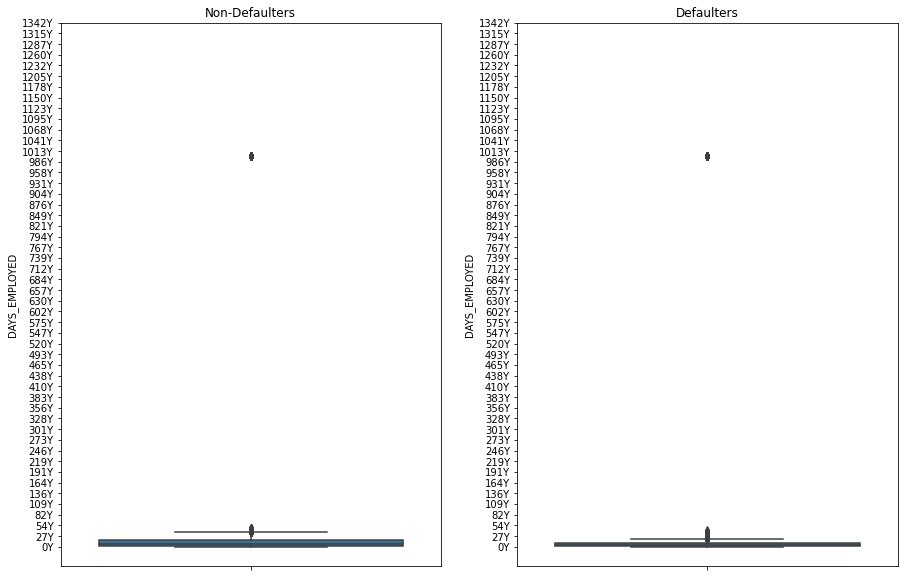

In [143]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='DAYS_EMPLOYED')
plt.title('Non-Defaulters')
ticks = np.arange(0,500000,10000)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='DAYS_EMPLOYED')
plt.title('Defaulters')
ticks = np.arange(0,500000,10000)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation based on Years of Employment
Both the data seems to have wrong values as it shows years of employment in 1000 years

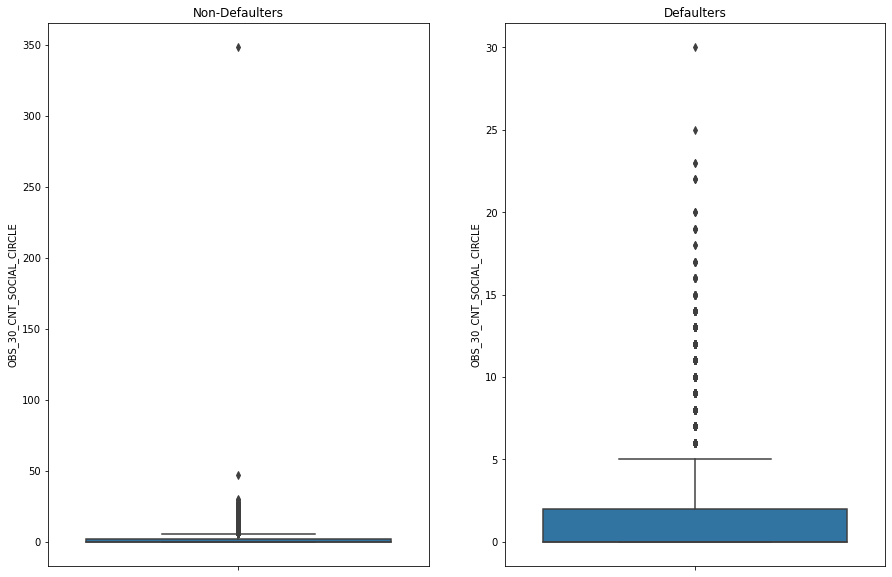

In [169]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='OBS_30_CNT_SOCIAL_CIRCLE')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='OBS_30_CNT_SOCIAL_CIRCLE')
plt.title('Defaulters')

plt.show()

#### Observation base on OBS_30_CNT_SOCIAL_CIRCLE
A lot of defaulters surroundings defaulted in 30 days past due compared to the non-defaulters.

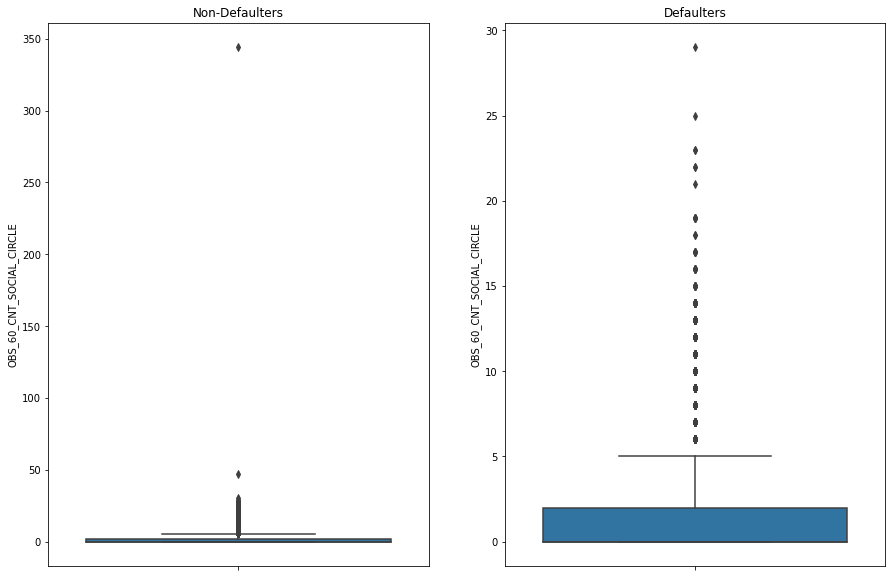

In [170]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = target_0, y='OBS_60_CNT_SOCIAL_CIRCLE')
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
sns.boxplot(data = target_1,y='OBS_60_CNT_SOCIAL_CIRCLE')
plt.title('Defaulters')

plt.show()

#### Observations Based on OBS_60_CNT_SOCIAL_CIRCLE
A lot of defaulters surroundings defaulted in 60 days past due compared to the non-defaulters

#### Bivariate Analysis

#### Observation
Based on the above plot, the people with higher education are buying goods with higher amount whereas the people with Lower Secondary education are buying goods with lower median value.

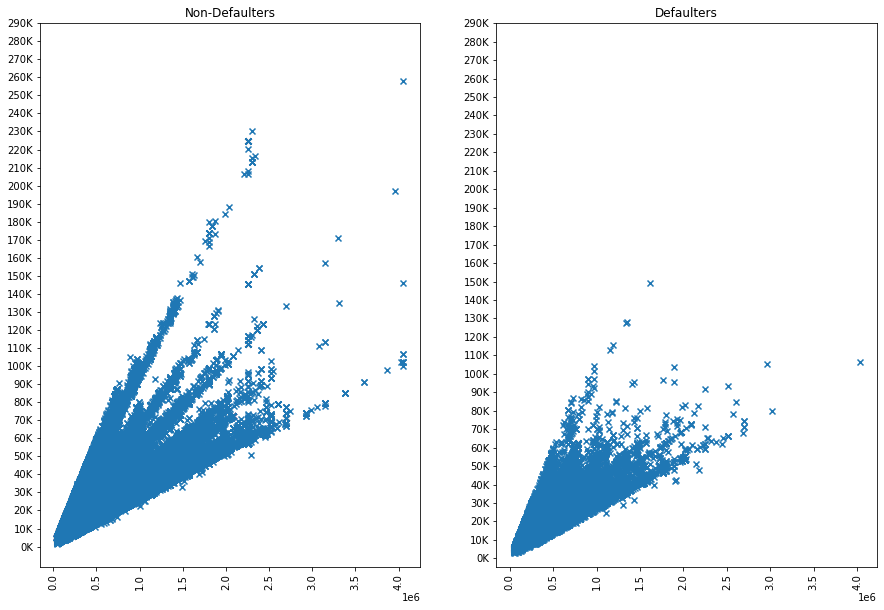

In [179]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(target_0.AMT_CREDIT,target_0.AMT_ANNUITY, marker='x')
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,300000,10000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)


plt.subplot(1,2,2)
plt.scatter(target_1.AMT_CREDIT,target_1.AMT_ANNUITY, marker='x')
plt.title('Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,300000,10000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation
From the above plot we can observe that as the amount of credit is increasing, the amount of annuity is also increasing.

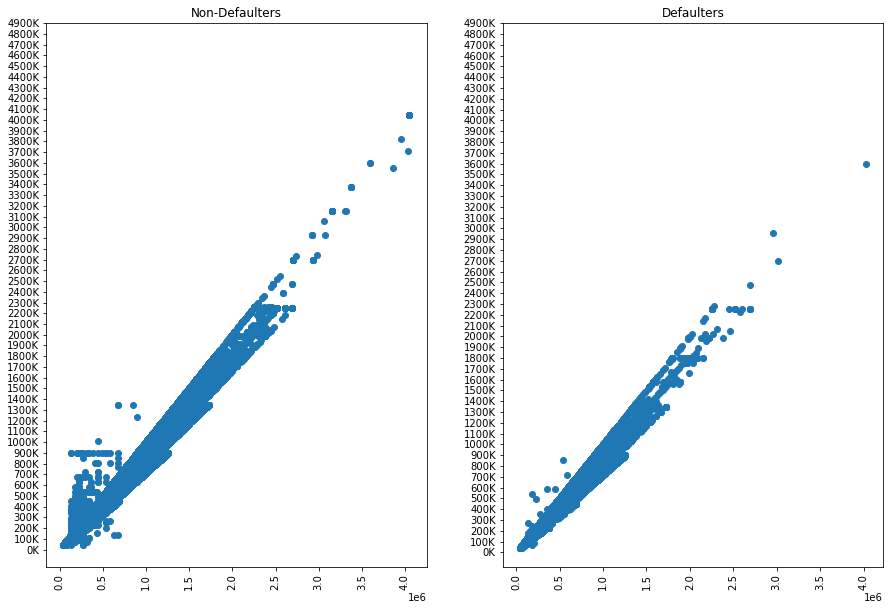

In [185]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(target_0.AMT_CREDIT,target_0.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,5000000,100000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)


plt.subplot(1,2,2)
plt.scatter(target_1.AMT_CREDIT,target_1.AMT_GOODS_PRICE)
plt.title('Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,5000000,100000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Observation
As the amount of credit increases the amount of goods price also increases. The defaulters have less outliers in data.  

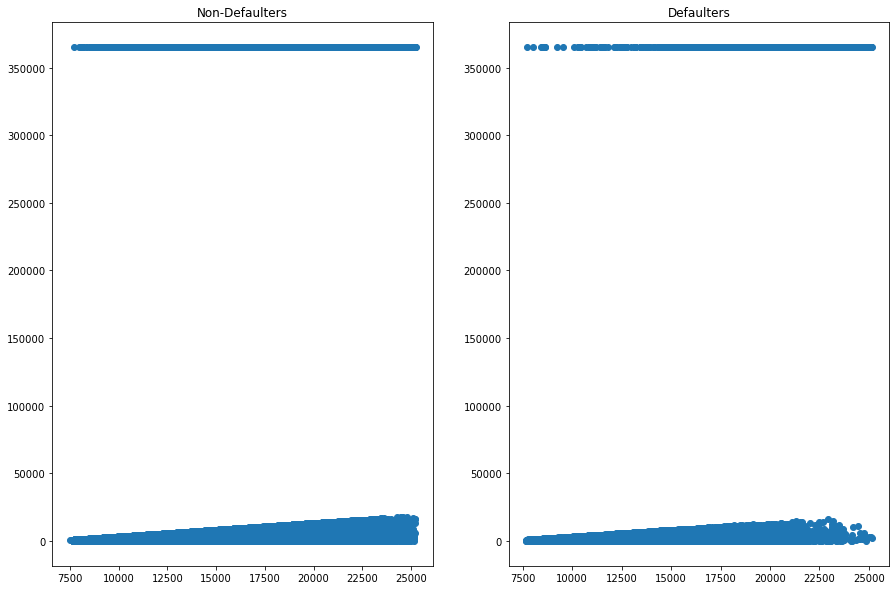

In [202]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(target_0.DAYS_BIRTH,target_0.DAYS_EMPLOYED)
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
plt.scatter(target_1.DAYS_BIRTH,target_1.DAYS_EMPLOYED)
plt.title('Defaulters')


plt.show()

#### Observation
From 7500 days onwards as the days of birth increases so does the employment days. There is also some very high values present in days employed.

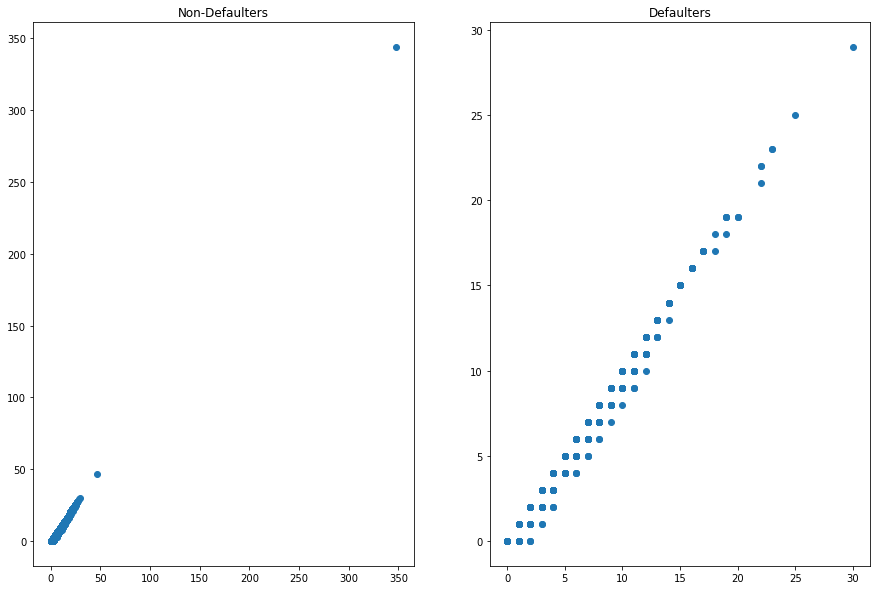

In [203]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(target_0.OBS_30_CNT_SOCIAL_CIRCLE,target_0.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
plt.scatter(target_1.OBS_30_CNT_SOCIAL_CIRCLE,target_1.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Defaulters')


plt.show()

#### Observation
The above plot suggests that for defaulter the number of people in their surrounding who have defaulted in past 30 and 60 days is also increasing significantly. The relationship betweeen past 30 days and past 60 days is 1. 

#### Categorical vs Contineous

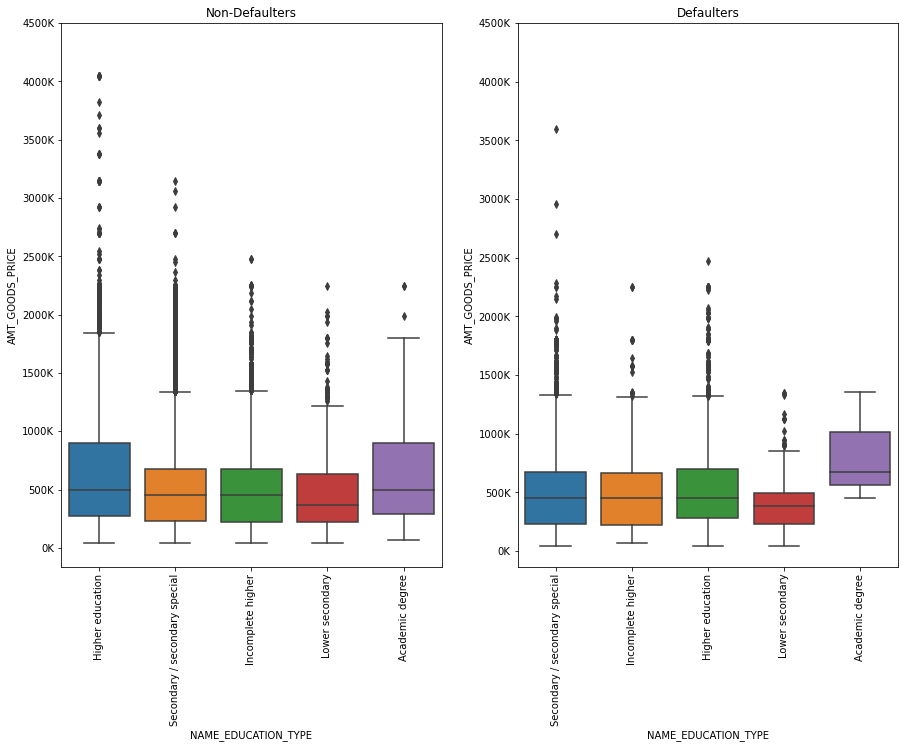

In [152]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x=target_0.NAME_EDUCATION_TYPE, y=target_0.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)


plt.subplot(1,2,2)
sns.boxplot(x=target_1.NAME_EDUCATION_TYPE, y=target_1.AMT_GOODS_PRICE)
plt.title('Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

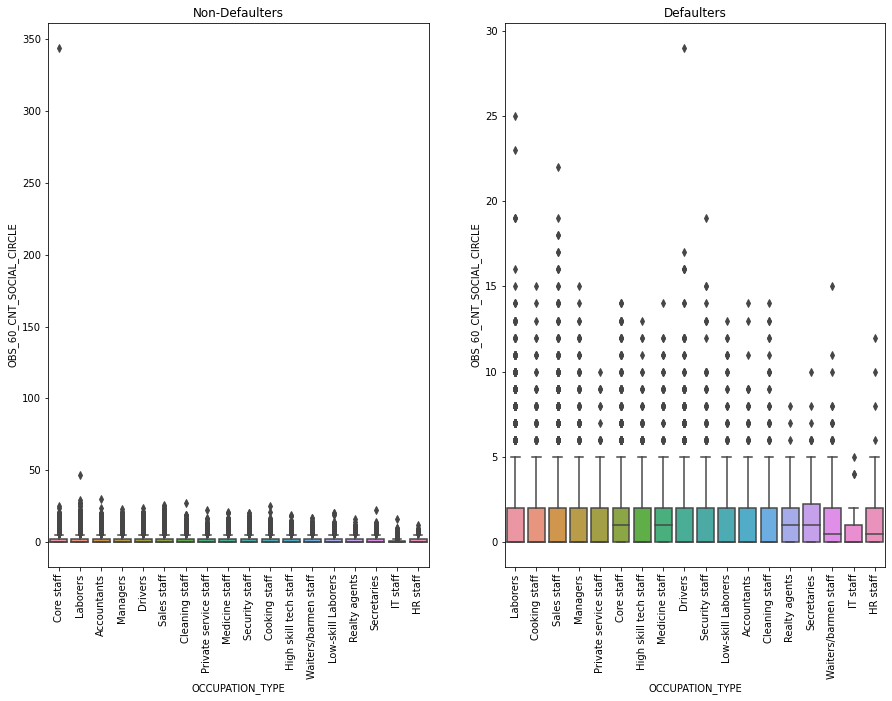

In [205]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x=target_0.OCCUPATION_TYPE, y=target_0.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.boxplot(x=target_1.OCCUPATION_TYPE, y=target_1.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
From the above plot we can observe that for non-defaulters the number of people who have defaulted in the surrounding in past 60 days is very less compared to those who have defaulted. Even the IQR for the defaulters are much higher compared to non-defaulters. 

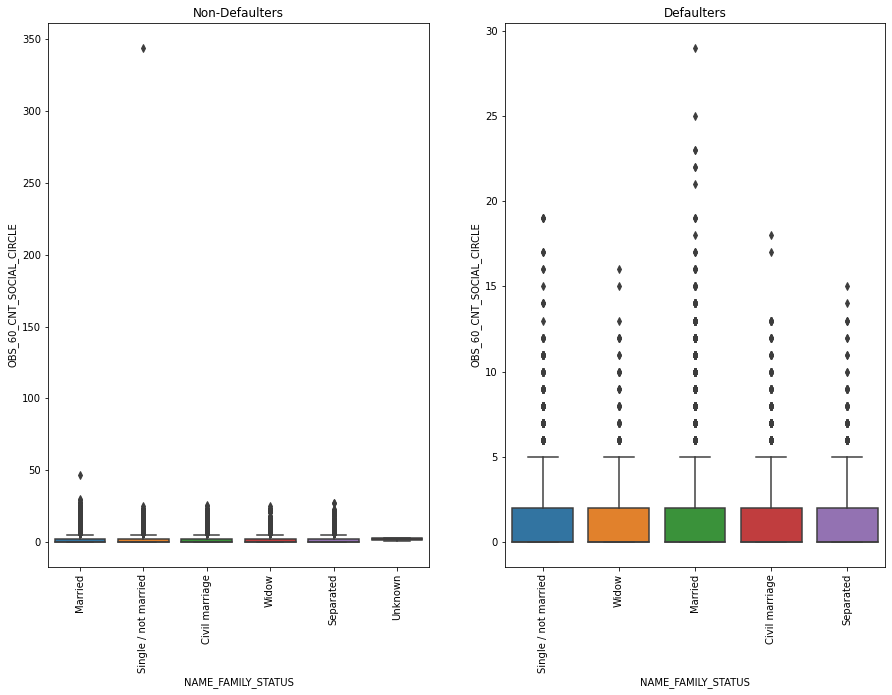

In [206]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x=target_0.NAME_FAMILY_STATUS, y=target_0.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.boxplot(x=target_1.NAME_FAMILY_STATUS, y=target_1.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
Each family type for non-defaulters are having less number of defaults in their surrounding. Whereas in case of defaulters the IQR range for each family type is nearly same with high number of defaulters in their surroundings. 

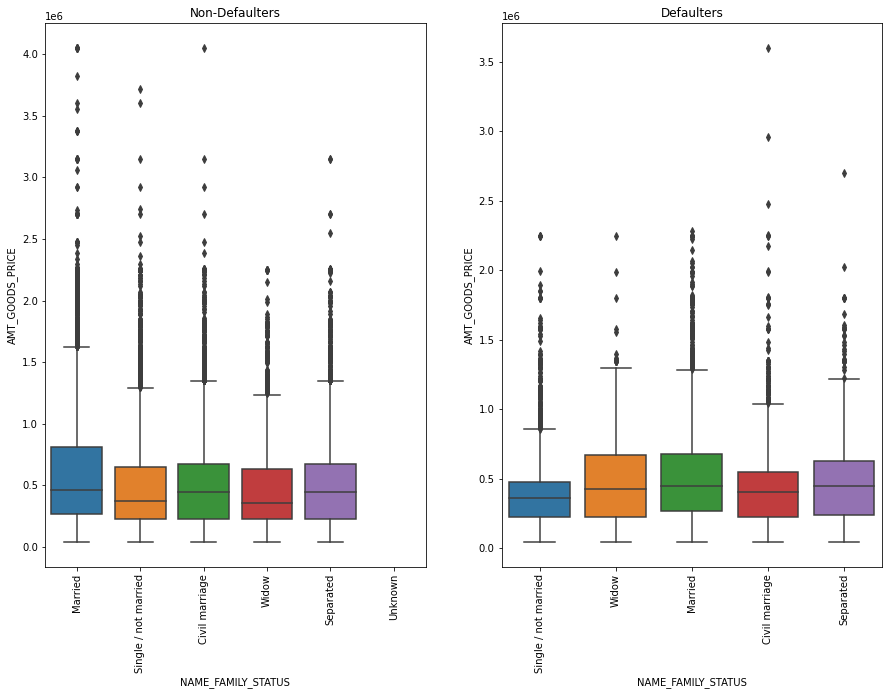

In [207]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x=target_0.NAME_FAMILY_STATUS, y=target_0.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.boxplot(x=target_1.NAME_FAMILY_STATUS, y=target_1.AMT_GOODS_PRICE)
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
Married individuals are buying the highest price goods whereas single ones are defaulting on the least amount of money.  

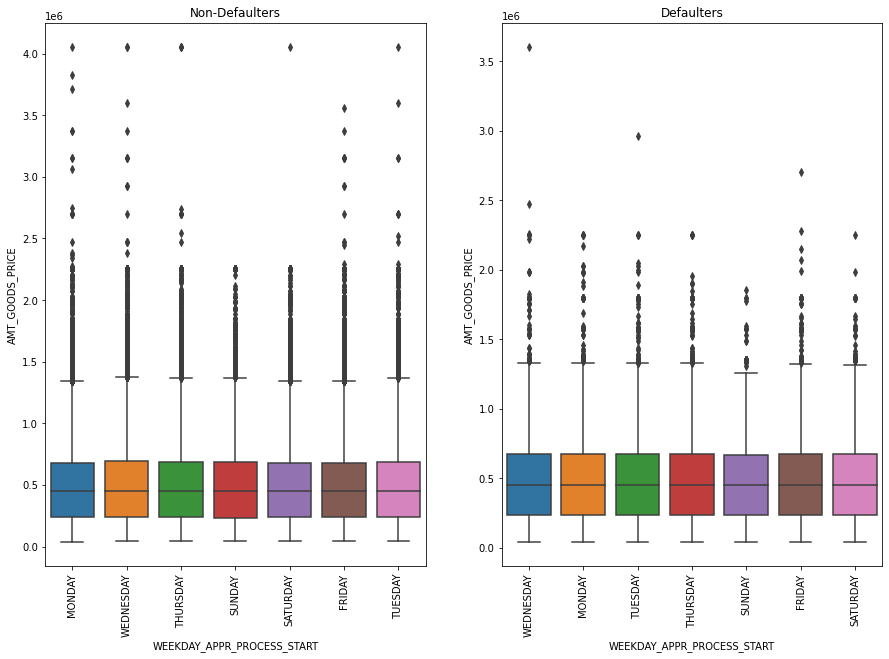

In [208]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x=target_0.WEEKDAY_APPR_PROCESS_START, y=target_0.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.boxplot(x=target_1.WEEKDAY_APPR_PROCESS_START, y=target_1.AMT_GOODS_PRICE)
plt.title('Defaulters')
plt.xticks(rotation=90)
plt.show()

#### Observation
Everyday people are starting the application process for wide range of prices of goods.

In [209]:
prev = pd.read_csv('application_data.csv', header=0)
prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [210]:
prev.shape

(307511, 122)

In [211]:
prev.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [213]:
# Percentage of Missing Values in Prev DataSet
(prev.isnull().sum()/prev.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [214]:
N_missing_list = []
for i in prev.columns:
    if (prev[i].isnull().sum()/app.shape[0])*100>40:
        N_missing_list.append(i)
        
prev.drop(N_missing_list, axis=1, inplace=True)

In [215]:
prev.shape

(307511, 73)

In [216]:
prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
prev.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [218]:
prev.DAYS_LAST_PHONE_CHANGE = abs(prev.DAYS_LAST_PHONE_CHANGE)
prev.DAYS_ID_PUBLISH = abs(prev.DAYS_ID_PUBLISH)
prev.DAYS_REGISTRATION = abs(prev.DAYS_REGISTRATION)
prev.DAYS_EMPLOYED = abs(prev.DAYS_EMPLOYED)
prev.DAYS_BIRTH = abs(prev.DAYS_BIRTH) 

### Merging the datasets

In [252]:
merged = pd.concat([app,prev],axis=0)
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_GROUP,YEAR_BIRTH_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200K-250K,20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250K+,30-40
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50K-100K,40-50
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100K-150K,40-50
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100K-150K,40-50


In [253]:
merged.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [254]:
cont_cols = []
cat_cols=[]
for i in merged.columns:
    if merged[i].nunique()<=18:
        cat_cols.append(i)
    elif merged[i].nunique()>18:
        cont_cols.append(i)

In [255]:
df = merged[cont_cols].corr()

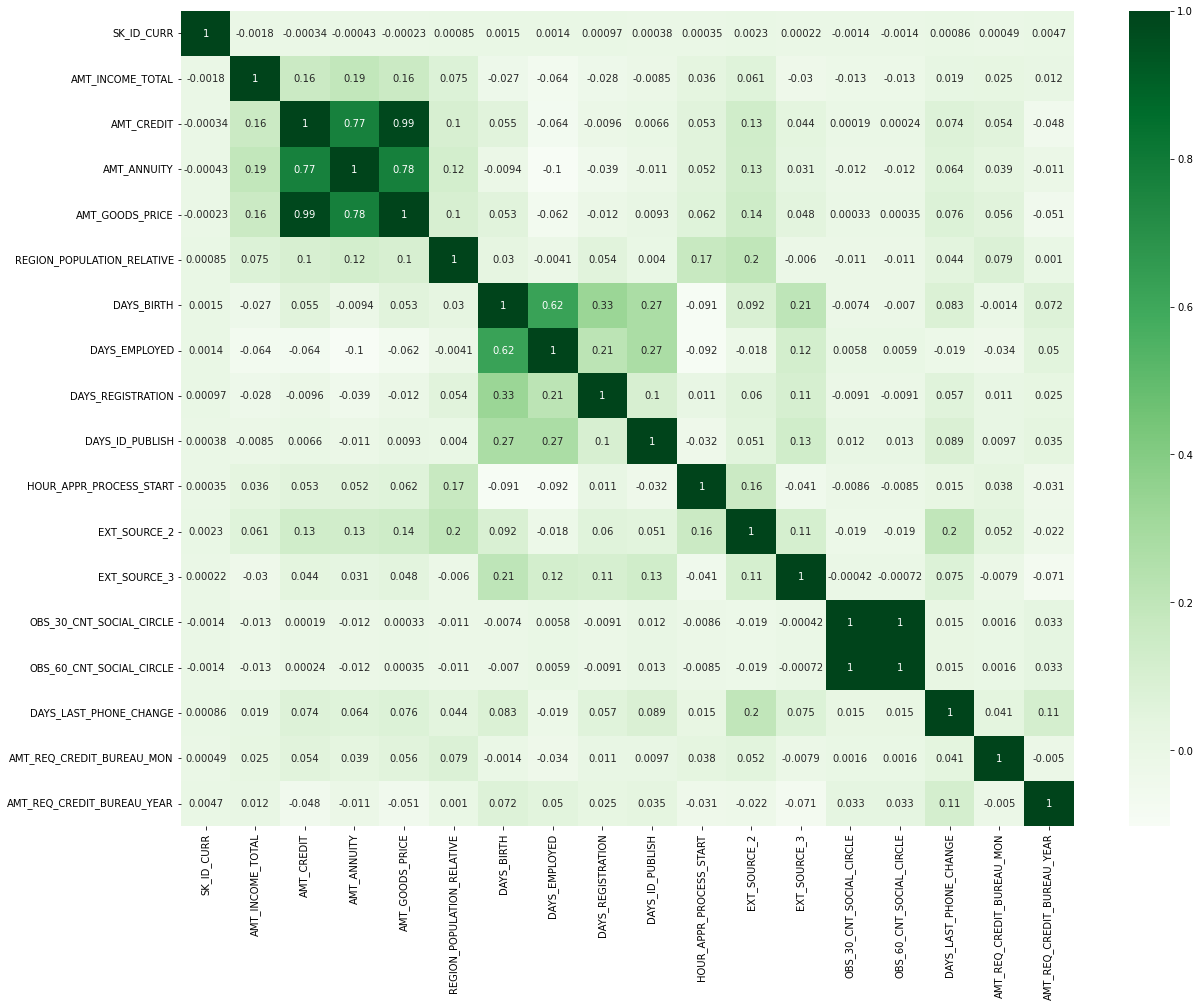

In [256]:
plt.figure(figsize=(20,15))
sns.heatmap(df, cmap='Greens', annot=True)
plt.show()

#### Dividing the columns on the basis of Target Column

In [263]:
merged_0 =merged[merged.TARGET==0]
merged_1 =merged[merged.TARGET==1]

#### Univariate Analysis

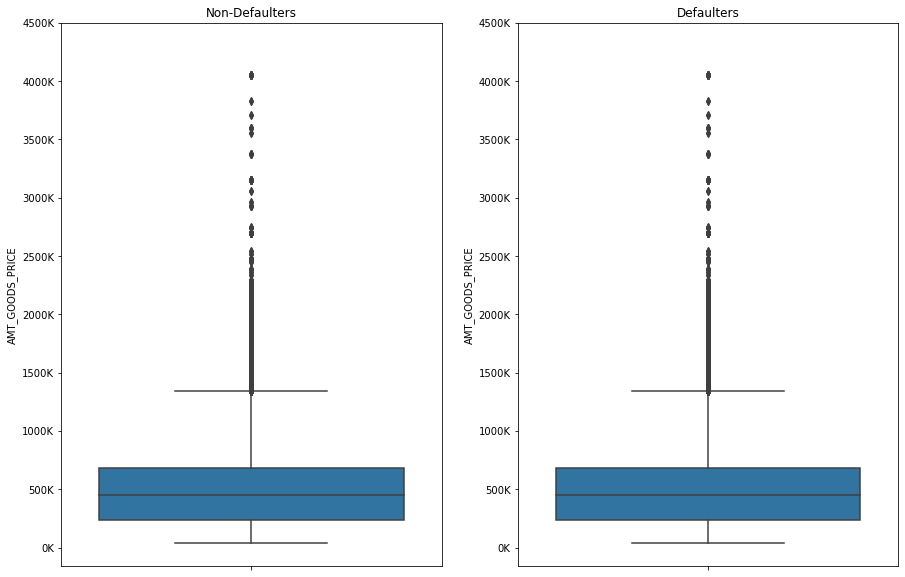

In [259]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = merged, y='AMT_GOODS_PRICE')
plt.title('Non-Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = merged,y='AMT_GOODS_PRICE')
plt.title('Defaulters')
ticks = np.arange(0,5000000,500000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

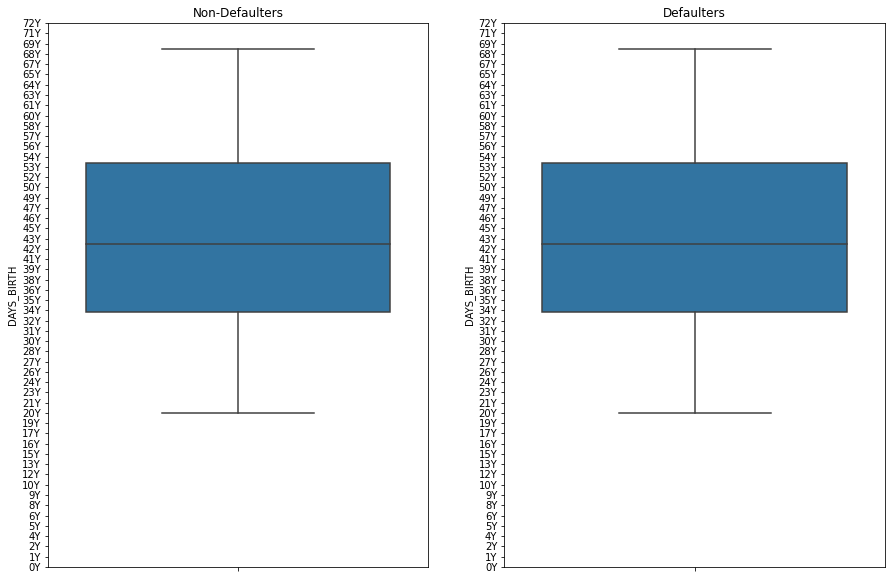

In [260]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data = merged, y='DAYS_BIRTH')
plt.title('Non-Defaulters')
ticks = np.arange(0,27000,500)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)

plt.subplot(1,2,2)
sns.boxplot(data = merged,y='DAYS_BIRTH')
plt.title('Defaulters')
ticks = np.arange(0,27000,500)
labels =['{}Y'.format(i//365) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

#### Bivariate analysis

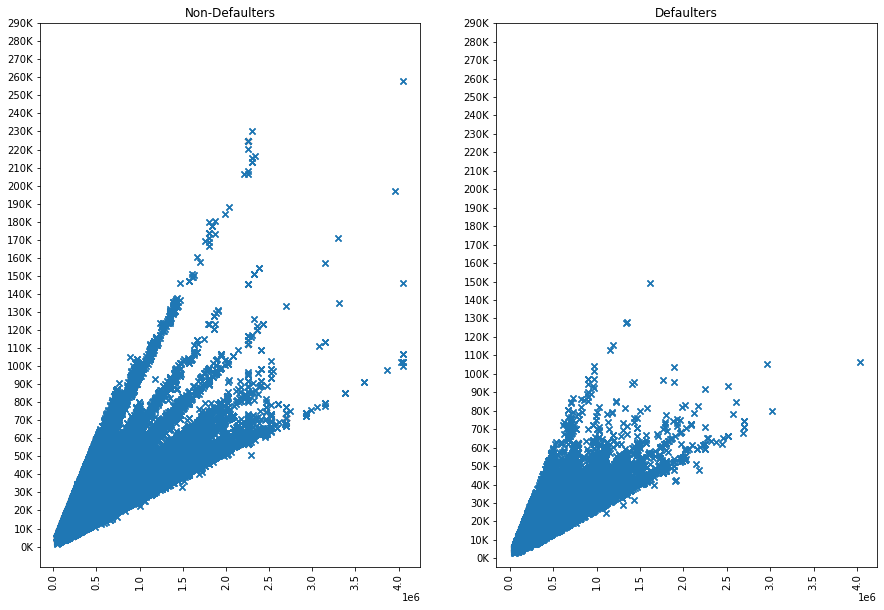

In [264]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(merged_0.AMT_CREDIT,merged_0.AMT_ANNUITY, marker='x')
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,300000,10000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)


plt.subplot(1,2,2)
plt.scatter(merged_1.AMT_CREDIT,merged_1.AMT_ANNUITY, marker='x')
plt.title('Defaulters')
plt.xticks(rotation=90)
ticks = np.arange(0,300000,10000)
labels =['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks,labels)
plt.show()

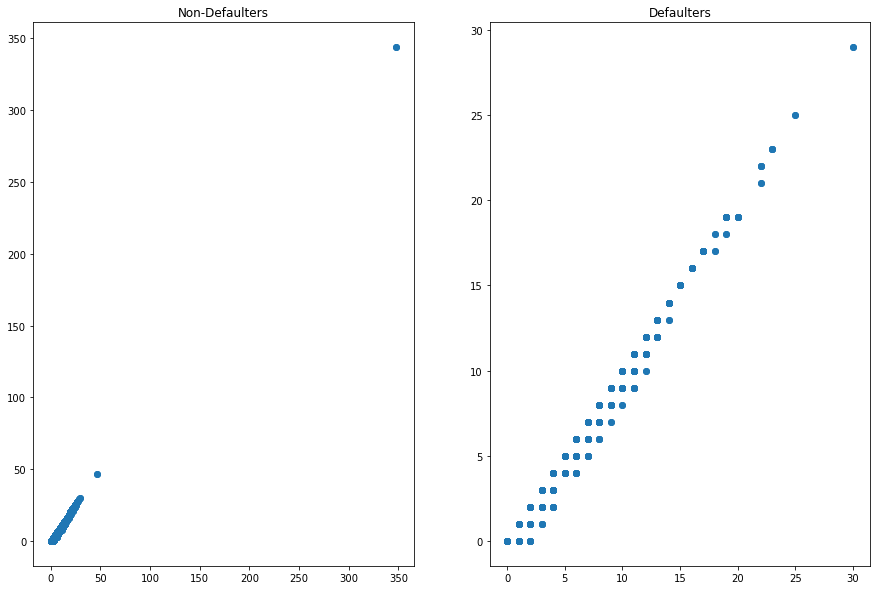

In [265]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(merged_0.OBS_30_CNT_SOCIAL_CIRCLE,merged_0.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Non-Defaulters')


plt.subplot(1,2,2)
plt.scatter(merged_1.OBS_30_CNT_SOCIAL_CIRCLE,merged_1.OBS_60_CNT_SOCIAL_CIRCLE)
plt.title('Defaulters')


plt.show()

## Final Observation
*  The result for these columns after merging doesn't change the correlation much for high correlation values of app dataset.
*  For defaulters the people in their surrounding defaulting in the past 30 and 60 days is having high correlation. 
*  The DAYS_EMPLOYED columns is having wrong values as observed above. 
*  The defaulters category does not have very large number of high income clients. 